By performing EDA, we can:
* Know the summary statistics
* Spot if there are missing values and the appropriate strategy for handling it
* Spot if the data is skewed (or imbalanced)
* Correlation between features
* Understand the important features (or attributes) worth keeping and unhelpful features

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [2]:
titanic = titanic = sns.load_dataset('titanic')

# Quick look into the dataset

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


# Summary statistics

In [6]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


# Basic Information

1. How many people who survived and died from the titanic crash? Can you use the appropriate visualization to show these people?

In [9]:
titanic['survived'].value_counts()

,count
survived,
0,549
1,342


<Axes: xlabel='survived', ylabel='count'>

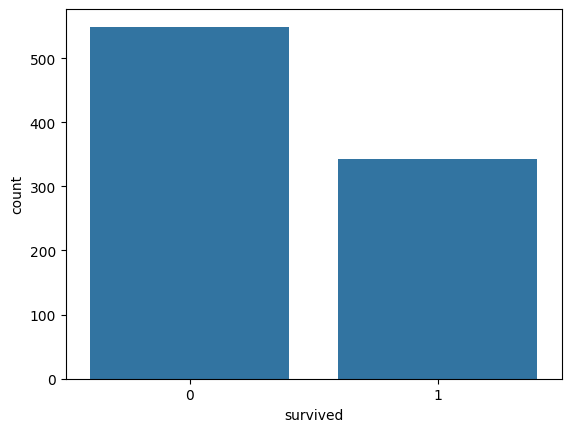

In [10]:
sns.countplot(x='survived', data=titanic)

2. How many `pclass` are there in the dataset? Is it the same as the the text column `class`?

In [11]:
titanic['pclass'].value_counts()

,count
pclass,
3,491
1,216
2,184


In [12]:
titanic['class'].value_counts()

,count
class,
Third,491
First,216
Second,184


In [13]:
p_class = titanic[['pclass', 'class']]
p_class.head()

,pclass,class
0,3,Third
1,1,First
2,3,Third
3,1,First
4,3,Third


It seems that both of these columns are the same except that one is numeric and other is text. They basically contain the same information of the class that the passengers paid for.

3. How many genders are there in the dataset?

In [15]:
titanic['sex'].value_counts()

,count
sex,
male,577
female,314


<Axes: xlabel='sex', ylabel='count'>

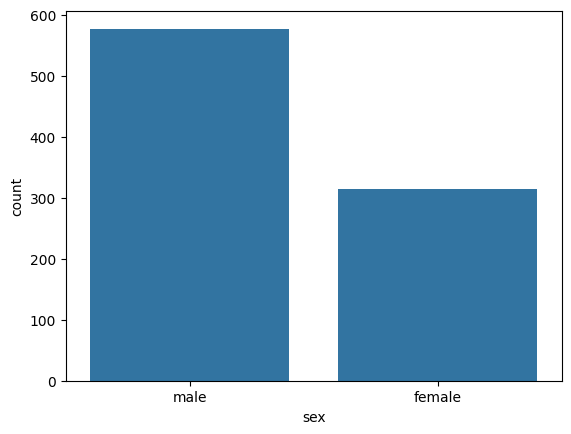

In [16]:
sns.countplot(data=titanic, x='sex')

4. Show the passengers who were less than 20 years

In [17]:
less_than_20 = titanic[titanic['age']<20]
less_than_20.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False


In [18]:
len(less_than_20)

164

5. Show the categories of the passengers in the column `who`. Use Pie chart to illustrate their values

<Axes: ylabel='count'>

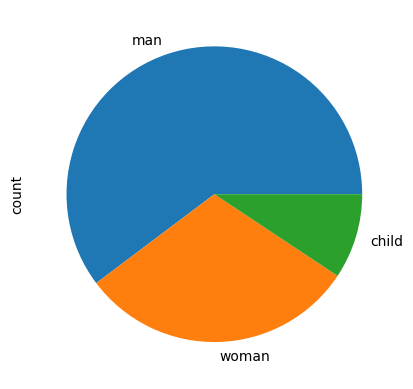

In [19]:
titanic.who.value_counts().plot(kind='pie')

6. How many unique cities are there in the column `embark_town`? Plot their occurences.

In [20]:
titanic['embark_town'].nunique()

3

<Axes: xlabel='embark_town'>

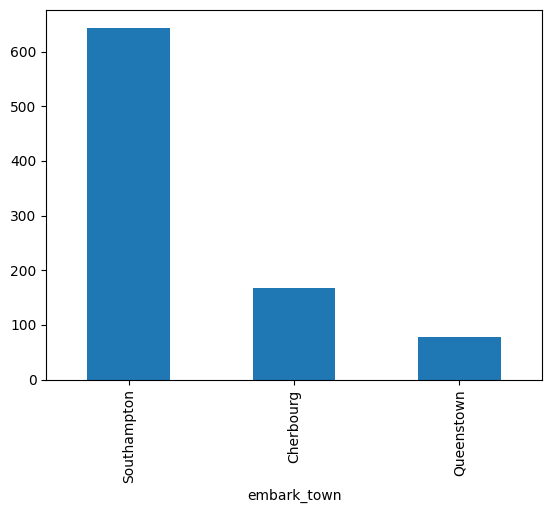

In [21]:
titanic['embark_town'].value_counts().plot(kind='bar')

# Missing Data

In [22]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


We can also use heatmaps to show the missing values

<Axes: >

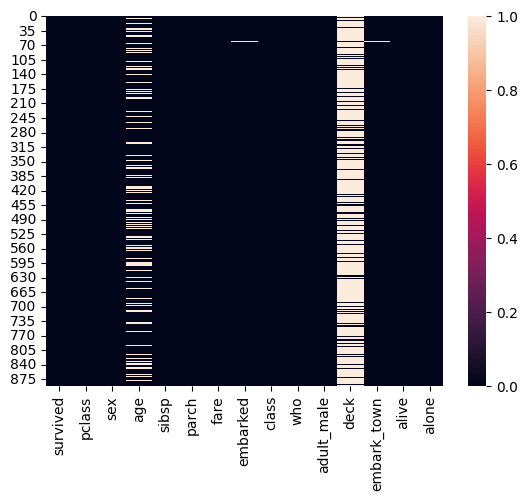

In [23]:
sns.heatmap(titanic.isnull())

# More Analysis

7. Create a graph of Titanic passengers showing survival (survived) and differentiate by gender (sex).

<Axes: xlabel='survived', ylabel='count'>

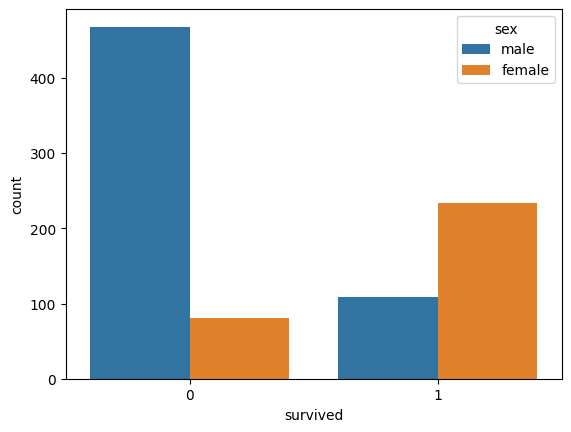

In [24]:
sns.countplot(data=titanic, x='survived', hue='sex')

8. Create a count plot of Titanic passengers showing survival (survived) by passenger class (class).

<Axes: xlabel='survived', ylabel='count'>

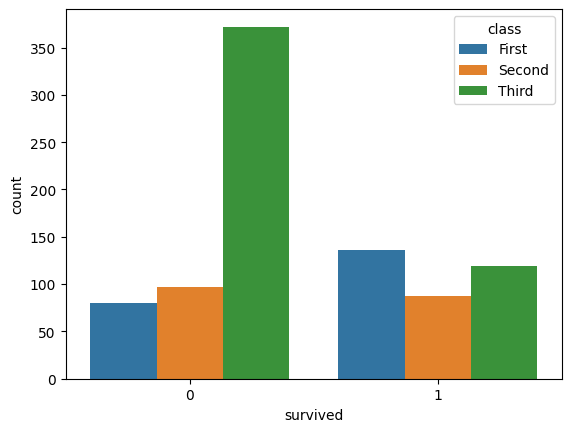

In [26]:
sns.countplot(data=titanic, x='survived', hue='class')

9. Plot a histogram of the age column from the Titanic dataset using 30 bins to visualize the distribution of passengers' ages.

<Axes: ylabel='Frequency'>

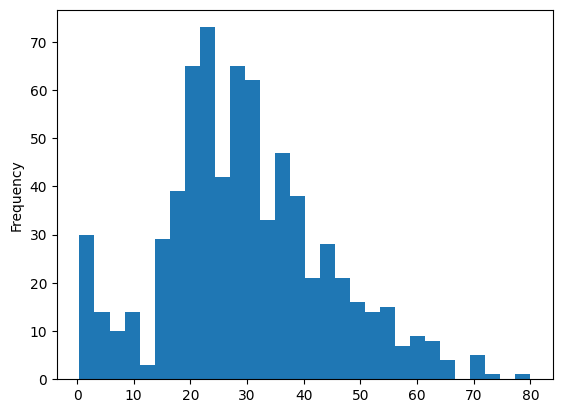

In [27]:
titanic.age.plot(kind='hist', bins=30)

10. Create a scatter plot of the Titanic dataset showing the relationship between age and fare, and differentiate the points by passenger class.

<Axes: xlabel='age', ylabel='fare'>

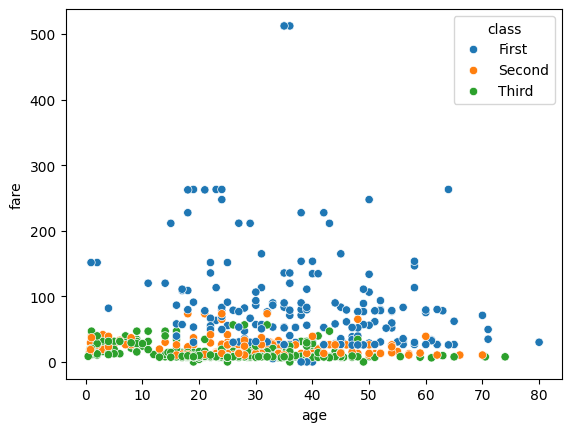

In [28]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='class')

That is obvious. The passengers who were in the first class paid more than other classes. And many females were in the first class.

<Axes: xlabel='age', ylabel='fare'>

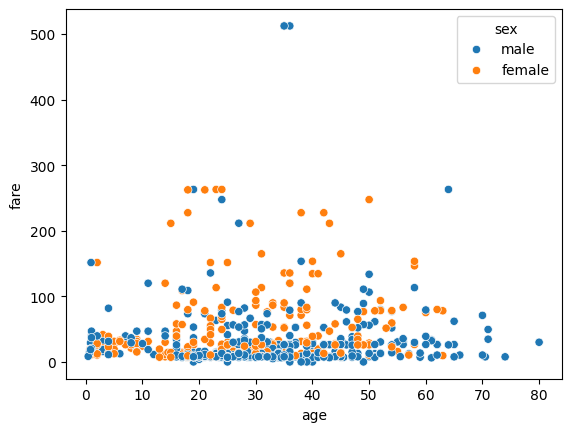

In [29]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='sex')

# Checking Correlating Features

Checking correlation can help you to see the similarity between features. If two features correlate, that means they contain the same information and if one of them is removed, the analysis/model can be less affected.

In [31]:
numeric_titanic = titanic.select_dtypes(include='number')
correlation = numeric_titanic.corr()
print(correlation)

          survived    pclass       age     sibsp     parch      fare
survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
sibsp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


Checking how the features correlate with the label:

<Axes: >

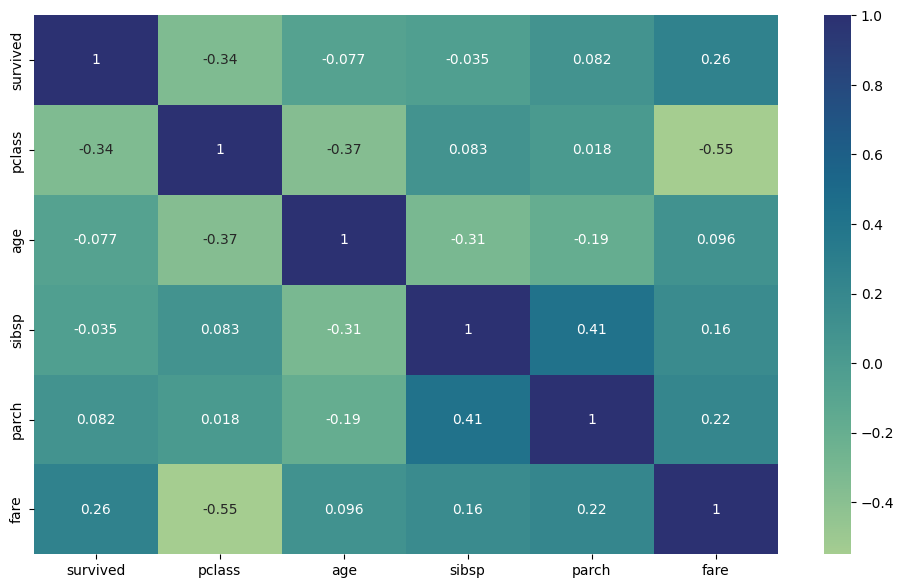

In [33]:
#### Visualizing correlation

plt.figure(figsize=(12,7))

sns.heatmap(correlation,annot=True,cmap='crest')